<a href="https://colab.research.google.com/github/Dk-Alpha/IBM-Data-Science-Course/blob/main/Data%20Analysis%20using%20python/My%20Notebooks/Final_project_%22House_Sales_of_King_County%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align=center><font size = 5>Data Analysis with Python</font></h1>


<h2 align=center><font size = 3> House Sales analysis "King County USA"</font></h2>
<h2 align=center><font size = 3> Dhruval Patel</font></h2>
<h2 align=center><font size = 2> Indus University Ahmedabad</font></h2>


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<h3>Data Cleaning and Wrangling

In [ ]:
df.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
df.drop(columns=["Unnamed: 0","id"], inplace=True)

In [ ]:
print("Values of Bedrooms: \n",df["bedrooms"].value_counts(),"\n")
print("Values of Bathrooms: \n",df["bathrooms"].value_counts(),"\n")

Values of Bedrooms: 
 3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64 

Values of Bathrooms: 
 2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64 



In [ ]:
df.bedrooms.replace(np.nan,df.bedrooms.mean(),inplace=True)
df.bathrooms.replace(np.nan,df.bathrooms.mean(),inplace=True)

<h3>Attribute Construction

In [ ]:
df.yr_renovated.value_counts().to_frame()

,yr_renovated
0,20699
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1
1954,1


In [ ]:
ren=[]
for x in df.yr_renovated:
  if x==0:
    ren+=[0]
  else:
    ren+=[1]
ren=pd.Series(ren)
df["renovated"]=ren

<h3>Statistical Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.042289
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.201253
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


<h3>Exploratory Data Analysis Using Visualization

In [ ]:
corr=df.corr()

<ipython-input-15-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

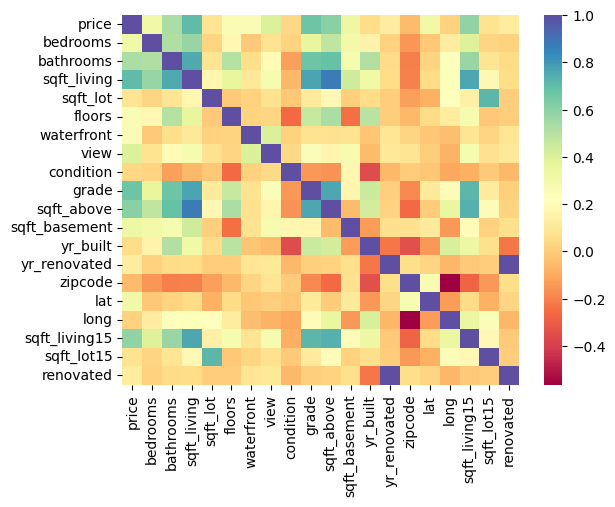

In [ ]:
  sns.heatmap(corr,cmap="Spectral")

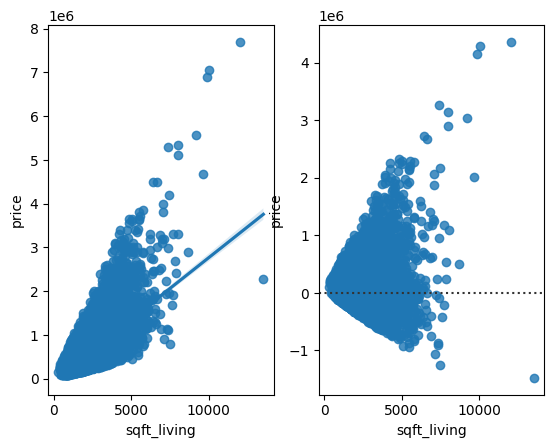

In [ ]:
plt.subplot(1,2,1)
sns.regplot(x=df.sqft_living,y=df.price)

plt.subplot(1,2,2)
sns.residplot(x=df.sqft_living,y=df.price)
plt.show()

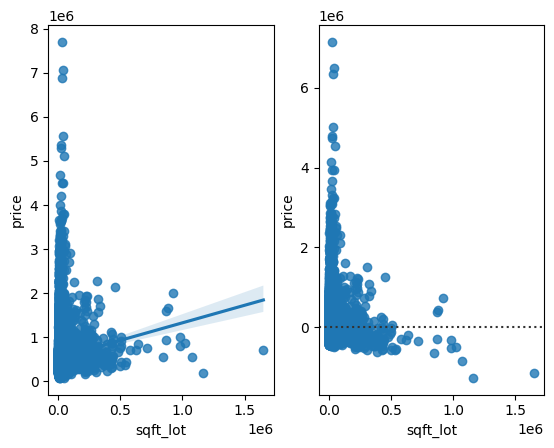

In [ ]:
plt.subplot(1,2,1)
sns.regplot(x=df.sqft_lot,y=df.price)

plt.subplot(1,2,2)
sns.residplot(x=df.sqft_lot,y=df.price)
plt.show()

<Axes: xlabel='floors', ylabel='price'>

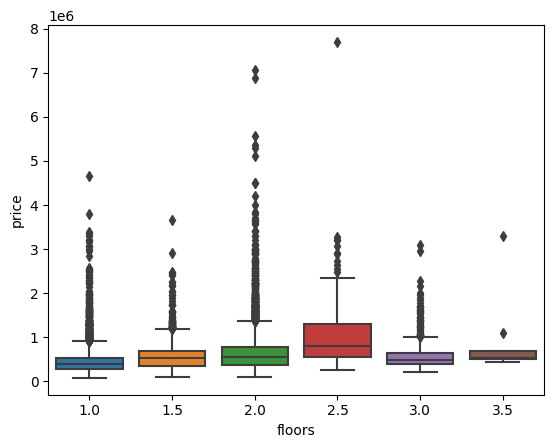

In [ ]:
sns.boxplot(x="floors",y="price",data=df)

<Axes: xlabel='renovated', ylabel='price'>

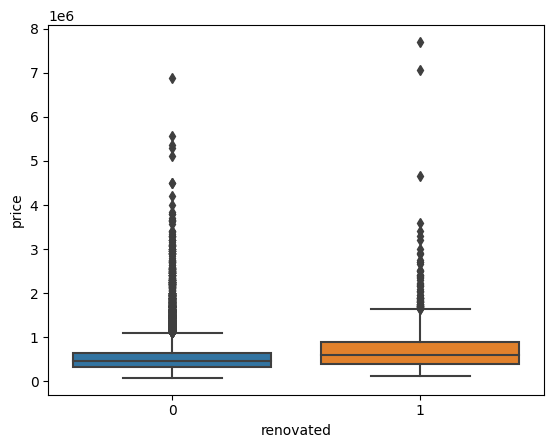

In [ ]:
sns.boxplot(x="renovated",y="price",data=df)

<Axes: xlabel='condition', ylabel='price'>

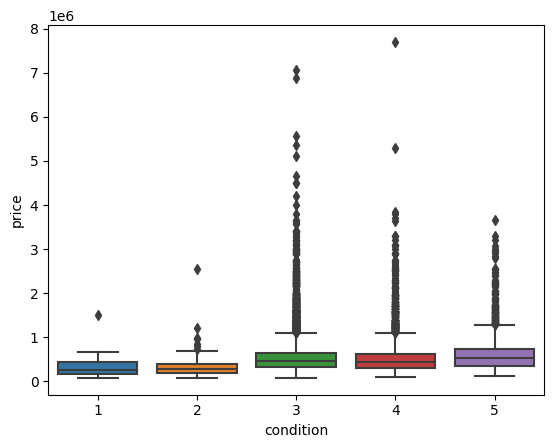

In [ ]:
sns.boxplot(x="condition",y="price",data=df)

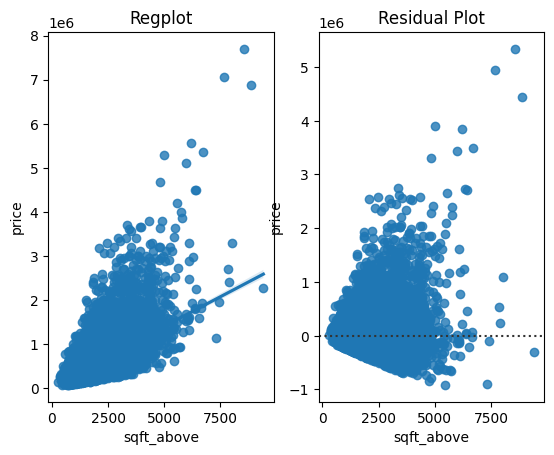

In [ ]:
plt.subplot(1,2,1)
plt.title("Regplot")
sns.regplot(x=df.sqft_above,y=df.price)

plt.subplot(1,2,2)
plt.title("Residual Plot")
sns.residplot(x=df.sqft_above,y=df.price)
plt.show()

<Axes: xlabel='price', ylabel='Count'>

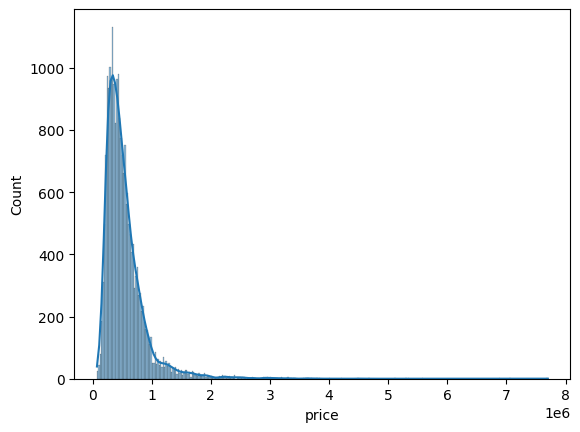

In [ ]:
sns.histplot(x="price",data=df,kde=True,)

<h3>Splitting Training and testing data

In [ ]:
x=df.drop(columns=["price","date","zipcode"])
y=df.price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

<h3>Pre-Processing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#simple training and testing data

mms=MinMaxScaler()
std=StandardScaler()
#minmax
x_train_min=mms.fit_transform(x_train)
x_test_min=mms.fit_transform(x_test)

#standardscaler
x_train_std=std.fit_transform(x_train)
x_test_std=std.fit_transform(x_test)

<h3>Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
#This array i.e normalised array contains the features normalised with minmax, standard scaler as well as not normalised features
norm_arr=[(x_train,x_test),(x_train_min,x_test_min),(x_train_std,x_test_std)]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
z=0 # z=0 i.e normal unchanged data , z=1 i.e minmax, z=2 i.e standardscaler
name=["normal","minmax","standard"]
scores={}
s=[]
for a in norm_arr:
  for i in range(1,3):
    pr=PolynomialFeatures(degree=i)
    x_train_poly=pr.fit_transform(a[0])
    x_test_poly=pr.fit_transform(a[1])
    #fitting
    lr.fit(x_train_poly,y_train)
    #Score with Training set
    s1=lr.score(x_train_poly,y_train)
    #Score with Test Set
    s2=lr.score(x_test_poly,y_test)
    s+=[(i,s1,s2)]
  scores[name[z]]=s
  s=[]
  z+=1
print(scores)

{'normal': [(1, 0.6975884413247002, 0.6892762894257517), (2, 0.8174504293833658, 0.7848743343908136)], 'minmax': [(1, 0.6976060341168944, -4.773961132483441e+23), (2, 0.8200499676199591, -5.556294757997941e+17)], 'standard': [(1, 0.6976235250439375, -7.436996931027958e+21), (2, 0.8200500141172676, -1022037312821592.8)]}


<h3>Ridge Regression

In [ ]:
scores2={}
s=[]
z=0
from sklearn.linear_model import Ridge
alpha_val=[0,0.001,0.01,0.1,1,10,100,1000]
for val in alpha_val:
  RR=Ridge(alpha=val)
  for i in range(1,3):
    pr=PolynomialFeatures(degree=i)
    x_train_poly=pr.fit_transform(x_train)
    x_test_poly=pr.fit_transform(x_test)
    #fitting
    RR.fit(x_train_poly,y_train)
    #Score with Training set
    s1=RR.score(x_train_poly,y_train)
    #Score with Test Set
    s2=RR.score(x_test_poly,y_test)
    s+=[(i,s1,s2)]
  scores2["Alpha Value: "+str(alpha_val[z])]=s
  s=[]
  z+=1
print(scores2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.16162e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Alpha Value: 0': [(1, 0.6799450399377709, 0.6641795492604368), (2, 0.8199155430422499, 0.7870284043017433)], 'Alpha Value: 0.001': [(1, 0.6975879774975782, 0.689284152687776), (2, 0.8189766607384908, 0.7867821730542975)], 'Alpha Value: 0.01': [(1, 0.6975561304254035, 0.6893123999426413), (2, 0.8178605722503494, 0.7859672101320643)], 'Alpha Value: 0.1': [(1, 0.6971295886156741, 0.6890653695656177), (2, 0.8169818995214831, 0.7850413683768392)], 'Alpha Value: 1': [(1, 0.6967092747476669, 0.6887877539654487), (2, 0.8161780818602501, 0.7839997070177778)], 'Alpha Value: 10': [(1, 0.6964819376994653, 0.689146675299374), (2, 0.8104525869174477, 0.7774531788402893)], 'Alpha Value: 100': [(1, 0.6902063618895833, 0.6864125364655721), (2, 0.8048979340946429, 0.7710410823182844)], 'Alpha Value: 1000': [(1, 0.6577258283901415, 0.6570503919193955), (2, 0.8028435105761222, 0.7696263667945474)]}


In [ ]:
val_score_1={}
val_score_2={}
tr_score_1={}
tr_score_2={}
for x in scores2:
  tr_score_1[x]=scores2[x][0][1]
  tr_score_2[x]=scores2[x][1][1]
  val_score_1[x]=scores2[x][0][2]
  val_score_2[x]=scores2[x][1][2]
print(val_score_1.values())

dict_values([0.6641795492604368, 0.689284152687776, 0.6893123999426413, 0.6890653695656177, 0.6887877539654487, 0.689146675299374, 0.6864125364655721, 0.6570503919193955])


Visualizing and Comparing **Scores** for **Ridge Regression**

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the first subplot
fig.add_trace(go.Bar(x=list(tr_score_1.keys()), y=list(tr_score_1.values()), name="Training set Score for 1 degree Transformation"))

# Add the third subplot
fig.add_trace(go.Bar(x=list(val_score_1.keys()), y=list(val_score_1.values()), name="Test set Score for 1 degree Transformation"))

# Add the second subplot
fig.add_trace(go.Bar(x=list(tr_score_2.keys()), y=list(tr_score_2.values()), name="Training set Score for 2nd degree Transformation"))

# Add the fourth subplot
fig.add_trace(go.Bar(x=list(val_score_2.keys()), y=list(val_score_2.values()), name="Test set Score for 2 degree Transformation"))

# Update the layout
fig.update_layout(
    barmode="group",
    xaxis_tickangle=-90,
    title="Comparison of Scores for Ridge Regression"
)

# Show the figure
fig.show()


> We can Conclude that for Ridge regression the highest observed Test set/ Validation Set for alpha value 0.01 and polynomial degree=2

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_poly=pr.fit_transform(x_train)
x_test_poly=pr.fit_transform(x_test)

#fit
RR.fit(x_train_poly,y_train)

#predict
RR_predict_second_deg=RR.predict(x_test_poly)
print(RR.score(x_test_poly,y_test))


0.7696263667945474


<ipython-input-110-78ba98f7bc9e>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-110-78ba98f7bc9e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




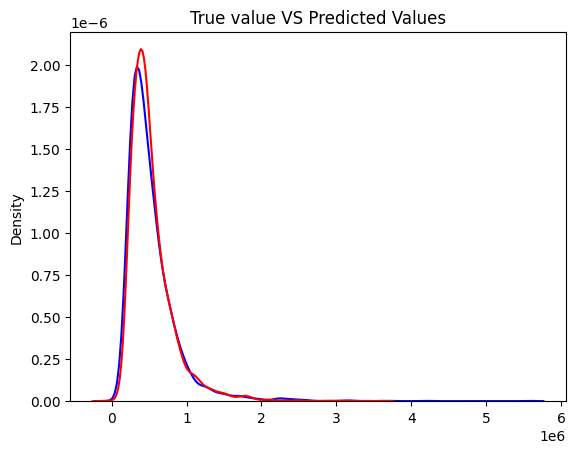

In [ ]:
sns.distplot(x=y_test,hist=False,color="blue")
sns.distplot(x=RR_predict_second_deg,hist=False,color="red")
plt.title("True value VS Predicted Values")
plt.show()

Thus, The **R2 score** of the **Ridge Regression** was found to be **76.96 %**.
> The features fit the model well when transformed to **second degree** polynomial.


**Comparing the First degree polynomial** prediction with the best fit **second degree polynomial prediction**

In [ ]:
#fit
RR.fit(x_train,y_train)

#predict
RR_predict_first_deg=RR.predict(x_test)
print(RR.score(x_test,y_test))


0.6570503919193971


<ipython-input-113-5b20289f90fd>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-113-5b20289f90fd>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-113-5b20289f90fd>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please s

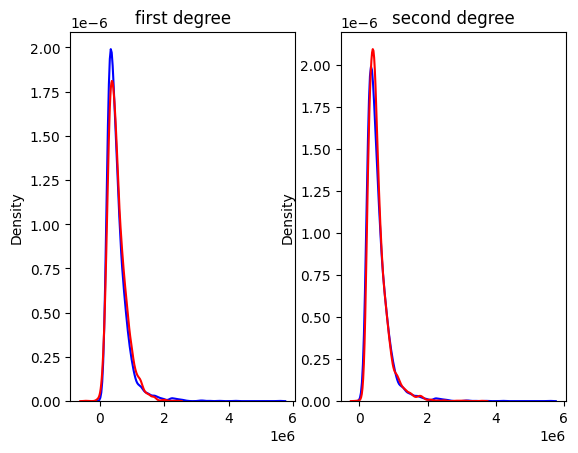

In [ ]:
plt.title("First Order predicton vs Second Order prediction")
plt.subplot(1,2,1)
sns.distplot(x=y_test,hist=False,color="blue")
sns.distplot(x=RR_predict_first_deg,hist=False,color="red")
plt.title("first degree")

plt.subplot(1,2,2)
sns.distplot(x=y_test,hist=False,color="blue")
sns.distplot(x=RR_predict_second_deg,hist=False,color="red")
plt.title("second degree")
plt.show()